<a href="https://colab.research.google.com/github/CoolerKula/Data-Visualisation-with-Matplotlib---Independent-Project/blob/main/Data_Visualisation_with_Matplotlib_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork Data Science: Data Visualisation with Matplotlib

## 1. Defining the Question

### a) Specifying the Data Analysis Question

Specify the reasearch question that you'll be answering.

> i.e. Which was the most improved country year 2017 - 2018 as per the GDP ranking?

● Do movies with a higher budget end up being popular?

● Does the length of the movie affect the vote count and popularity?

● Does higher popularity mean higher profits?

● What features are associated with the top 10 revenue movies?

● Which genres are most popular from year to year?

### b) Defining the Metric for Success

How will you know that your solution will have satisfied your research question?

● By determining if movies with a higher budget end up being popular?

● By determining if the length of the movie affects the vote count and popularity?

● By determining if higher popularity translates to higher profits?

● By determining what features are associated with the top 10 revenue movies?

● By determining which genres are most popular from year to year?

### c) Understanding the context 

Provide some background information....

Mima is a startup film company that aims to enter the film industry.
As a data scientist consultant working for the startup, you're required to perform an
analysis and provide recommendations on the kinds of movies that the startup should
create in order to have a profitable business.

### d) Recording the Experimental Design

Describe the steps/approach that you will use to answer the given question.

1. Clean data
2. Analyse and sort data
3. Visualize data

### e) Data Relevance

How relevant was the provided data?

## 2. Reading the Data

In [ ]:
# Loading libraries
# ---
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    

In [ ]:
# Loading the dataset
# --- 
# Dataset url = http://bit.ly/MoviesDS
# --- 
# 
df = pd.read_csv('http://bit.ly/MoviesDS')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# Determining the size 
# ---
#
df.shape

(10866, 21)

In [ ]:
# Checking the datatypes
# ---
# 
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [ ]:
# Statistical summary
# ---
#
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
# Checking for missing values 
# ---
# 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## 3. External Data Source Validation

You can make sure your data matches other credible information. This ensures that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

External validation can often be as simple as checking your data against some other data i.e. country population your dataset with country population on world bank data.

Replace the text found on this text cell with your external data source validation information.

## 4. Data Preparation

In [ ]:
# Dropping irrelevant columns
# ---
#
df.drop(['id','imdb_id', 'homepage', 'overview'], axis=1, inplace=True)

In [ ]:
# Handling missing data
# ---
# 
df['cast'].fillna('missing', inplace=True )
df['director'].fillna('missing', inplace=True)
df['tagline'].fillna('missing', inplace=True)
df['keywords'].fillna('missing', inplace=True)
df['genres'].fillna('missing', inplace=True)
df['production_companies'].fillna('missing', inplace=True) 
df['budget'] = df['budget'].replace(0, np.NAN) 

In [ ]:
# Previewing the outcome
# ---
# 
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
# Checking for duplicates 
# ---
#
df.duplicated().sum()

1

In [ ]:
# Dropping the duplicates 
# ---
#
df.drop_duplicates(inplace = True) 

# Checking for duplicates for comfirmation
# ---
#
df.duplicated().sum()

0


## 5. Solution Implementation

Here we investigate the questions that would help craft our recommendations.

### 5.a) Questions

#### **Question 1**: Do movies with a higher budget end up being popular?

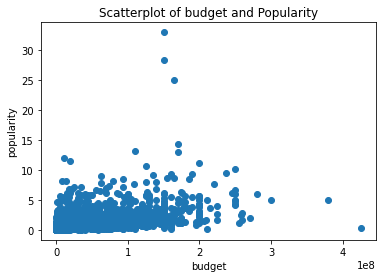

In [ ]:
# Question 1
# ---
# Do movies with a higher budget end up being popular?
# ---
#

# Create a scatter plot to determine relationship between budget and the popularity
budget = df['budget']
popularity = df['popularity']

# YOUR CODE GOES BELOW HERE
plt.scatter(budget, popularity)
plt.title('Scatterplot of budget and Popularity')
plt.xlabel('budget')
plt.ylabel('popularity')
plt.show()

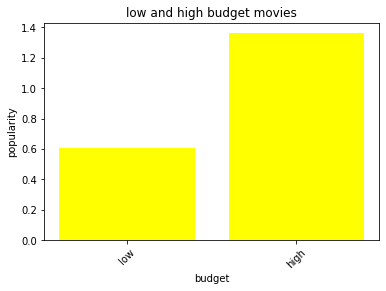

In [ ]:
# Create a bar chart to compare low budget movies with high budget movies
# ---
# 

# create two groups (low and high budget movies) using the median
m = df['budget'].median()
low_budget =  df.query('budget < {}'.format(m))
high_budget =  df.query('budget >= {}'.format(m))

# check low budget and high budget mean values respecively 
mean_popularity_of_low_budget = low_budget['popularity'].mean()
mean_popularity_of_high_budget = high_budget['popularity'].mean()

# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_popularity_of_low_budget , mean_popularity_of_high_budget]
labels=['low','high']

# YOUR CODE GOES BELOW HERE
# Hint: use tick_label parameter
plt.bar(labels, height = heights, color = 'yellow')
plt.xticks(rotation = 45)
plt.ylabel('popularity')
plt.xlabel('budget')
plt.title('low and high budget movies')
plt.show()

In [ ]:
# Percentage difference
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947093

**Question 2:** Does the length of the movie affect the vote count and popularity?

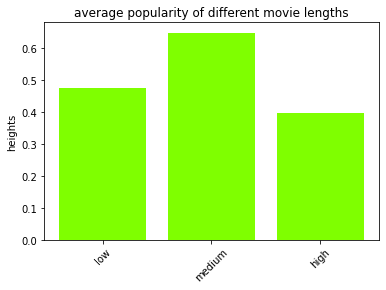

In [ ]:
# Question 2
# ---
# Does the length of the movie affect the vote count and popularity?
# ---
# 

# Create 3 movie groups:  <60 min: short, 60 min <=  <= - 120 min: medium,  >120 min: long 
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
longer = df.query('runtime > {}'.format(200))

# Check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = longer['popularity'].mean()

# Create a bar chart of average popularity of different movie lengths
locations = [1,2,3]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['low','medium','high']

# YOUR CODE GOES BELOW HERE
plt.bar(labels, height = heights , color = '#7FFF00')
plt.xticks(rotation = 45)
plt.ylabel('heights')
plt.title('average popularity of different movie lengths')
plt.show()


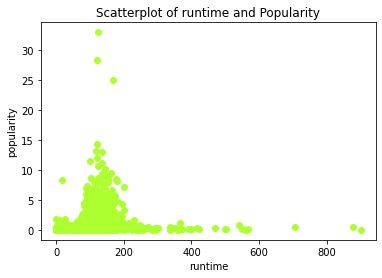

In [ ]:
# Create a scatterplot to determine the relation between runtime and popularity 
# ---
# 
runtime = df['runtime']
popularity = df['popularity'] 

# YOUR CODE GOES BELOW HERE
plt.scatter(runtime ,popularity,  color = '#ADFF2F')
plt.title('Scatterplot of runtime and Popularity')
plt.xlabel('runtime')
plt.ylabel('popularity')
plt.show()

**Question 3:** Does higher popularity mean higher profits?

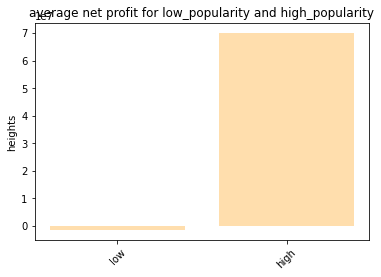

In [ ]:
# Question 3
# ---
# Does higher popularity mean higher profits?
# ---
#

# Getting the mean of popularity 
m_popularity = df['popularity'].median()
lower_popularity =  df.query('popularity < {}'.format(m_popularity))
higher_popularity =  df.query('popularity >= {}'.format(m_popularity))

# Creating a new column called profit (profit = revenue - budget)
df['profit'] = df['revenue'] - df['budget']

# Calculating the average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels=['low','high']

# YOUR CODE GOES BELOW HERE
plt.bar(labels, height = heights , color = '#FFDEAD')
plt.xticks(rotation = 45)
plt.ylabel('heights')
plt.title('average net profit for low_popularity and high_popularity')
plt.show()

**Question 4:** What features are associated with the top 10 revenue movies?

In [ ]:
# Question 4
# ---
# What features are associated with the top 10 revenue movies?
# ---
#

# YOUR CODE GOES BELOW HERE
top10_revenue=df.sort_values(by=['revenue'], ascending=False)
top10_revenue.head(10)



,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,9.432768,237000000.0,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
5231,4.355219,200000000.0,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1.645034e+09
4361,7.637767,220000000.0,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,new york|shield|marvel comic|comic|superhero,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,1.299558e+09
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
4,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09
14,5.944927,280000000.0,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,marvel comic|comic|sequel|superhero|vision,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,1.125036e+09
3374,5.711315,125000000.0,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,It all ends here.,self sacrifice|magic|frog|sorcerer|school,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09,1.202818e+09
5422,6.112766,150000000.0,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,queen|musical|princess|betrayal|snowman,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09,1.124219e+09
5425,4.946136,200000000.0,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,Unleash the power behind the armor.,terrorist|war on terror|tennessee|malibu|marve...,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09,1.015440e+09


1. All of them have a rating of 6.5 and above
2. Action is the most common genre
3. All of them have a runtime of 102 and above

**Question 5:** Which genres are most popular from year to year?

In [ ]:
# Question 5
# ---
# Which genres are most popular from year to year?
# ---
#

# YOUR CODE GOES BELOW HERE
Most_popular_genres= df.groupby(['genres', 'release_year']).apply(lambda df: df.loc[df.runtime.idxmax()])
Most_popular_genres['genres'].sort_index()
#Action is the most popular genre year on year

genres   release_year
Action   1976             Action
         1982             Action
         1985             Action
         1986             Action
         1988             Action
                          ...   
missing  2010            missing
         2012            missing
         2013            missing
         2014            missing
         2015            missing
Name: genres, Length: 6114, dtype: object

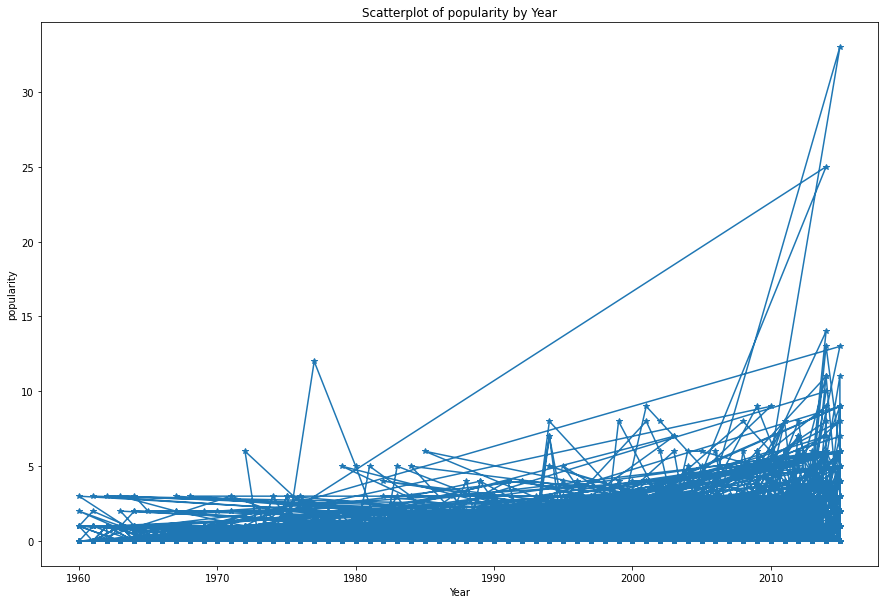

In [ ]:
#most_popular = movies_df4['popularity'].astype(float).round(0)
popularity = Most_popular_genres['popularity'].astype(float).round(0)
Year = Most_popular_genres['release_year']
plt.figure(figsize=(15,10))
plt.plot(Year, popularity, marker = "*")
plt.title('Scatterplot of popularity by Year')
plt.xlabel('Year')
plt.ylabel('popularity')

# Display
plt.show()

### 5.b) Recommendations

From the above analysis, below are our recommendations:

1. The higher the budget the higher the returns and popularity of a movie hence production companies should have a higher budget so as to produce quality movies that have high returns
2. The length of the movie affects the vote count and popularity hence movies should be atleast 100 minutes and above
3. Higher popularity does not always translate to higher profits hence the film company should not spend alot of resources in popularising movies

## 6. Challenging your Solution

## 7. Follow up questions

During this step, you rethink and propose other ways that you can improve your solution.

### a). Did we have the right data?

Yes

### b). Do we need other data to answer our question?

You can look into the questions you brainstormed that you weren't taken into account during analysis due to a lack of data. Were those questions important to have been left out  of your analysis?

No

### c). Did we have the right question?

Were there any other questions that we needed to have answered?

yes